# 3 Drell-Yan Event Generator with VEGAS
Consider the Drell-Yan production process at an electron-positron collider, in which an electron and positron
collide to produce a virtual photon or a Z boson that then decays into a muon-antimuon pair,
$e^+e^- \rightarrow Z/\gamma \rightarrow \mu^+\mu^-$. As described in lecture and in Ref. [5], the differential cross section for center-of-mass energy $E_{CM} = \sqrt{\hat{s}}$ and scattering angle $\theta$ is given by

$$\frac{d\sigma}{d\Omega}(\hat{s}, \cos \theta) = \frac{\alpha^2}{4\hat{s}} \left[ A_0(\hat{s})(1 + \cos^2\theta) + A_1(\hat{s}) \cos \theta \right],$$

Where $A_0$ and $A_1$ are given by

$$
A_0(\hat{s}) = Q_e^2 - 2Q_eV_\mu V_e \chi_1(\hat{s}) + (A_\mu^2 + V_\mu^2)(A_e^2 + V_e^2) \chi_2(\hat{s}),
$$

$$
A_1(\hat{s}) = -4Q_eA_\mu A_e \chi_1(\hat{s}) + 8A_\mu V_\mu A_e V_e \chi_2(\hat{s}),
$$

and the $\chi_1$ and $\chi_2$ are given by

$$
\chi_1(\hat{s}) = \frac{\kappa\hat{s}(\hat{s} - M_Z^2)}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\chi_2(\hat{s}) = \frac{\kappa^2 \hat{s}^2}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\kappa = \frac{\sqrt{2}G_F M_Z^2}{4\pi\alpha}.
$$

Useful constants are given in the tables below.

| Fermions        | $Q_f$ | $V_f$                                | $A_f$ |
|-----------------|-------|--------------------------------------|-------|
| $u, c, t$       | $+\frac{2}{3}$ | $\left(+\frac{1}{2} - \frac{4}{3}\sin^2\theta_W\right)$ | $+\frac{1}{2}$ |
| $d, s, b$       | $-\frac{1}{3}$ | $\left(-\frac{1}{2} - \frac{2}{3}\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |
| $\nu_e, \nu_\mu, \nu_\tau$ | $0$ | $\frac{1}{2}$ | $+\frac{1}{2}$ |
| $e, \mu, \tau$  | $-1$ | $\left(-\frac{1}{2} + 2\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |

| Variable                | Symbol            | Value                                                   |
|-------------------------|-------------------|---------------------------------------------------------|
| conversion factor       | $GeV−2 ↔ pb$      | $3.894 \times 10^8 \, \text{pb} = 1 \, \text{GeV}^{-2}$ |
| Z boson mass            | $M_Z$             | $91.188 \, \text{GeV}$                                  |
| Z boson width           | $\Gamma_Z$        | $2.4414 \, \text{GeV}$                                  |
| QED running coupling    | $\alpha$          | $\frac{1}{132.507}$                                     |
| Fermi constant          | $G_F$             | $1.16639 \times 10^{-5} \, \text{GeV}^{-2}$             |
| Weinberg angle          | $\sin^2\theta_W$  | $0.222246$                                              |


In [ ]:
# # Conversion factor from GeV−2 to pb
# conversion_factor_GeV2_to_pb = 389400000.0

# # Z boson mass (MZ)
# M_Z = 91.188

# # Z boson width (ΓZ)
# Gamma_Z = 2.4414

# # QED running coupling (α)
# alpha_QED = 0.0075467711139788835

# # Fermi constant (GF)
# G_F = 1.16639e-05

# # Weinberg angle (sin^2(θW))
# sin2_theta_W = 0.222246

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
cf = 3.894e+8 #pb per GeV^2
Mz = 91.188 # GeV --> Z boson mass
Gz = 2.4414 # GeV  --> Gamma_Z=Z boson width
alpha= 1/132.507
Gf = 1.16639e+5 # GeV^-2
Wtheta = 0.222246 # Weinberg angle
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

Qe = -1
Vmu= -0.5 + 2*Wtheta**2
Ve = -0.5 + 2*Wtheta**2
Amu= -0.5
Ae = -0.5

In [17]:
def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# cross section for center of mass energy and scattering angle
def cross_section(s,cost):
    s = np.array(s)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    return const*(A0(s)*(1+cost**2) + A1(s)*cost)

In [18]:
# To find max value

s=np.linspace(100,40000,10000)
cost=np.linspace(-1,1,10000)

# To find max value
# fvals=[]
# for si in s:
#     for costi in cost:
#         fvals.append(crosssection(si,costi))
# F_VAL_MAX = np.max(fvals)

# s2=np.linspace(100,500,1000)
# fvals=[]
# for si in s2:
#     for costi in cost:
#         fvals.append(crosssection(si,costi))
# F_VAL_MAX = np.max(fvals)

# But this maximum value was way below the maximum value for the nested for loop

# So we tried to find the maximum value around the resonance point at the Mass of the Z boson (squared)
fvals=[]
for costi in cost:
    fvals.append(cross_section(Mz**2,costi))
F_VAL_MAX = np.max(fvals)*1.05 # We give it a leeway of 5%

In [19]:
print(np.max(fvals))

329673508683786.06


In [20]:
# array of vals for ECM
# array of vals for cos(theta)

In [25]:
# let X be Cost
# let Y be E_cm

# cost range of [-1,1]
# E_cm range of [10,200]

XMIN = -1
YMIN = 100 # 10**2
XMAX = 1 # changed from 1
YMAX = 40_000 # 200**2

# YMIN = -1
# XMIN = 100 # 10**2
# YMAX = 1
# XMAX = 40_000 # 200**2

In [26]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure()  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()

    #cmap = mpl.colormaps["jet"] # doesnt work on jupyter notebook (different version of python probably)
    cmap = mpl.cm.jet # added this!!!
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    plt.show()

In [27]:
# need to change for drell-yan

# standard acceptance-rejection method
def brute_force(nPoints, seed=None):
    nFunctionEval = 0
    yy1_rej_method = []
    yy2_rej_method = []
    maxWeightEncounteredRej = -1.0e20 # arbitrarily small value
    generator = np.random.RandomState(seed=seed)
    while len(yy1_rej_method) < nPoints: # compared to the small value
        rr = generator.uniform(size=3)
        # given a range for the gaussian ex in lab, need to 
        yy1, yy2 = XMIN + rr[0] * (XMAX - XMIN), YMIN + rr[1] * (YMAX - YMIN)
        nFunctionEval += 1
        f_val = cross_section(yy1, yy2)
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val
        if f_val > F_VAL_MAX:
            print(
                f" f_val={f_val} exceeds F_VAL_MAX={F_VAL_MAX}, program will now exit"
            )
            exit(99)
        if f_val / F_VAL_MAX > rr[2]:
            yy1_rej_method.append(yy1)
            yy2_rej_method.append(yy2)
    return {
        "yy1": yy1_rej_method,
        "yy2": yy2_rej_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncounteredRej,
    }

 f_val=5631109087880175.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=540661571082661.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3463610964633965.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1425441300830228.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5099929435016978.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2067403063111008.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=628153594870703.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1047385164445565.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3175212215128261.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1295184019292616.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=753918802288745.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=694422831157489.4 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=394012507494376.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6593597803710476.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=494032689345458.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5437433708147862.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1899244908848914.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2464506487450761.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1816097774874635.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3948228773996278.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3356423060391763.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=988455147648335.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6012784440430188.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3190698327028142.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3659954791410818.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2291978702762864.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9144921196133872.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=744947359129612.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=512429873773411.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6754984734593391.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4817763312041910.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4793636465870887.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2343676104386312.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3003034741455136.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=554342448776892.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2338320717877785.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2382202241181981.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=348645716868646.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2299661563934879.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2497243603105868.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=370822942611226.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1876493501596614.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=435114167130772.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=572501553444920.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1615881736432672.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7366180840972912.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5367343332805337.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=438196964324916.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3809839529101024.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=694564529957354.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2512650713303298.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7035946660375890.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1088155727176740.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1441967385191898.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3805772523981764.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3431923408641915.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5254800079620060.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=787379867492066.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=616100586006936.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=484735457454047.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=762853553626402.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5786713451029175.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2850755807475080.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1822760414005371.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2135430358284609.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5692942251513266.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1205337180998318.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6201016150438400.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1467168548604102.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4700383726297142.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4920474031311622.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1163572605795436.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1409731121476733.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3699760917264401.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1149179093269850.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6026856471969712.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1517374575596601.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1049818306258617.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4600181031583322.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1666241841380630.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1183575004119802.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2245166736110638.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2540213829850277.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=773165871240297.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=8715743466762165.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8759221815252748.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=944955936581948.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1833436765072112.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4610832683855489.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1077217412189069.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4486841412074250.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4783695305384365.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1055104039024044.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=706667915780799.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1106620023765882.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3818598305593654.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2822364015687243.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1513358644741529.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3577503425330625.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4557503234090508.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2180215602456081.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6272634109032491.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1378138349107269.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2702982435972025.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2619781602540198.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=396686571526502.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1850051917428190.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3884979699169462.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=2114294396278684.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1782412579593196.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1031859074942831.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3818255766778664.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=551386020647036.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5375003543218862.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1657473782204228.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5743442825311765.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=573817466122790.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1713440521170143.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=813559452308767.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4897665762991517.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=6872463564564153.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=412575349168102.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0177343887553912e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=412723415245823.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7608150522017929.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3398430959510805.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3292180120166781.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5743033927123589.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1960720900408040.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1315242469787376.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2006322435093177.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1673371349887247.2 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=4860816373209638.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2054172158622703.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1631650601732008.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=409485501123943.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=460905936958808.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2720914997327910.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=723845745295269.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4289348212421531.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1349174095438144.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1325885675423768.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1867841883466683.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6174700332838932.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1476481419696099.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1371745469536508.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=967377507412593.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1614521407461820.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428438825530244.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1846317506461534.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=988400024071896.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1215674446058699.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=350565137238948.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5213661348600943.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2591512847496648.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2186819601736541.8 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2397027019431607.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6224347200624130.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3289747482544543.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1228822703883866.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2432594842958035.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1834459815273494.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3199847714881250.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2247181637619090.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4547690242754332.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0248447945628058e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4353070351677698.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6005441685605682.0 exceeds F_VAL_MAX=346157184117975.4

 f_val=3427544456367212.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1360738900612453.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=895321253622464.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1798221503839926.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1665976579801964.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4175336373716336.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1758121026485477.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=849078268703002.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1616716072545132.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1524495463241912.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1579120846874673.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1605457754964969.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2873499277064075.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1191063183507513.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3876177927186537.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2091769692729672.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4252198657433772.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2119081764128796.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1225699929406289.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4930582292949555.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4707112314413038.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2269498212635996.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=435964669460101.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=918624451860776.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1847139266621068.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2233942548976590.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1935290987921147.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1966487229888875.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3863654179637651.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=392845188053549.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3123047152126660.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=992228849328617.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2034561530296508.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3151243404214343.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2204421625253756.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4930360537716644.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=8870021032128997.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=473116379497187.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=741054582591876.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=999646459514952.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=892869508331566.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2295418922550442.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2206630435158583.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1451890035898188.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2092433535903408.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=603872634231688.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2029448969427341.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=462933362889952.4 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=547084043407567.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=652498698571549.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5101031325488956.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1422918497778640.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1228743760349126.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=742263953476567.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=850667518556218.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1425041092019505.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4932461709119685.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4505117113318892.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=480150636615332.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1225691436364471.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=2724123359753121.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3731178147571688.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5371695796580078.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4209534355986623.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4819333924958011.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4462133646078342.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=451790276131430.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=712748110415833.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2958024679262341.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1018743264433209.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=734114040766782.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3114807826126883.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=410896843253485.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1971340718851402.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7239906054555293.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2581716221563583.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2667693324623121.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1235575918470745.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2979727946211135.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1031984444276159.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5984685117564767.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5252754537168427.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7939585254297022.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1569747198187968.0 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=7704381862521646.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=993728183184758.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1047446860732616.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=955250859487757.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2151400723784534.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4396114688056712.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=432977372462713.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6844737632441884.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=749361203026823.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5502476261845281.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2776359261071906.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4793833523636377.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=5060174770491151.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=375509021407820.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=944591742969210.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1186559848812184.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3734313054383821.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=663650201345996.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9775230038768314.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=705974400289382.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1737390341894043.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3497206641541221.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5204486071723158.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=631556584281586.4 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2157203764581660.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2361451763949105.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1294498538336136.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=969591393278085.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1453468608197793.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3185801924208788.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1988993327811615.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=415034431227340.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1299963546039916.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1014577408102726.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7715311949305877.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3839604797675720.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=9120556559030532.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=812456451089669.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8550436313908722.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2151301031848013.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1209945262534725.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=949683328550169.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4419590258920115.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4990383577543109.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=790057912769808.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=391617159569396.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9880131165597284.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1438162893817288.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=738148207191425.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2988921110036400.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=425764479753064.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=813688805697940.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1219976101953735.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2494167303078415.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1061306875311984.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2879038980896471.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6197700623024730.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=981404987704182.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=423135810321717.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1271263526839947.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=939090564315214.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5207418191998457.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1796925547424626.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4104482433448722.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2135272582686289.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2491999093724586.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1177674743685326.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1667261982315206.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1905293308219347.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3579089660729303.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3314176458812166.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=779604864453088.6 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=6803069843577731.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=802008549145618.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=550854870933618.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9695817626186110.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=544891319110574.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=610349121046443.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5826874936032966.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=633914802186910.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2421818290430077.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1011420662345032.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=479069205772767.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1219089555784792.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=1660795429425425.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=363742315533074.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8785769373009725.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7633470047270500.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1944851357562087.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=386983610039390.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1368985590215799.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1154753444862759.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=419694316354585.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2369987486293730.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1004166713129648.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=621739263432750.9 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=431463623464068.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1894281070000326.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5016006194892028.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=388175600634984.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4919824921944721.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4299512375235955.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=949298795860525.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=963679234792737.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1526907547319699.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4175458574912964.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4652278529511072.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=481893954881428.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=3414876536018302.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=709311867206696.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5687503165831735.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=688697059637975.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5994815094223760.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5487016691983923.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=448310806554705.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2801964223256537.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1859902901355433.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2389088703200999.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=982673341318460.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=438030932934556.06 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2919011971871419.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4578549051310195.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3101972455648935.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=487657351055795.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3180155740551690.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5484263642734334.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3478405457912628.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1763641109514808.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=984552785962832.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1125384984091241.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5157123002927564.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6212420995219775.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=5215537314318537.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5924721694402234.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3274892277289319.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=607872558776027.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1676798383124574.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1014311892774588.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1194551171864371.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3158442559285127.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5286783520021686.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=352525466461357.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=445806879245765.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1596228674108069.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=673434665549131.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2269381287555833.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=958976760775550.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6434013695487490.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2516385172107067.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=393508863451509.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6447992269419182.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9084752030176340.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=755225401201836.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1138687039193055.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4578765365588898.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=432860285266854.2 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=8555706788768115.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=372632462239315.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1724495506298864.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=712679172460479.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=350488816956807.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2753371393076974.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1079529090254559.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=885609024410113.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1363136527845411.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=940901985605512.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=708801667441110.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3335185033356818.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=3387163465025946.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=350933208236313.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=545926931179564.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1212165132805775.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6674494657141413.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1927125136572911.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1057976960280968.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4817017939743537.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=503609202528023.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=784961171514041.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6401143427844498.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1684480219837770.8 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=735426965781699.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6062710390067042.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3295613728956118.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3055608439227004.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=521321159309732.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=385722112651702.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4434489365682897.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4866470073623574.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=566263091084780.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1838555448243638.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1119023871775566.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9533954025491372.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2417496714287665.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=443532022836755.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=677147610630874.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5011909743582301.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=955823358779026.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=360876224885540.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=866539528458785.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6261193628377349.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4351071098027475.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=824482661670693.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1235745764654037.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1304993201512011.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=3436671174344467.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=974300898004717.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=558847660870061.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1678519454159610.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4138796021502923.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4315298558937376.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5504350329666706.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1421185926871910.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8887380807200305.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=786119948186803.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4970181873408559.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=572001962678804.9 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1232967202319736.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2908402747667059.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6516592653471414.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3643257377132564.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3776971890033858.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2128946417663658.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8437131115680479.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1042593638085675.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=584983233752641.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=834522335764395.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=937432082979840.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2342943679523175.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3680932635521712.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1250400948454877.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3815670559495238.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8228839079824353.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1396165573880159.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1799995088925822.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0558543060367066e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1675772494578034.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2962496381989722.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=636348783155224.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2081608637609580.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1543086355264945.2 exceeds F_VAL_MAX=346157184117975.4,

 f_val=3581181929046073.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1277243326856963.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6510254508704416.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1325073660931217.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1963829200146266.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1498560993918106.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1601800833559056.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=353836624957198.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2291970037842658.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5657467376507773.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1297601321223372.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=682295906525836.6 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1140993604577197.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2045172979617248.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2592775045502584.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3503438872604099.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3284088521634577.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2480427640608210.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7413992237003623.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=736045689908507.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=523669033096187.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3313600935380036.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5540857508272361.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1087472316511730.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1338448592818231.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5665080140015126.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=556545103796709.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1570533162678780.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=575347858764268.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1622265794639259.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=399419966950395.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3732438236642699.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=477347488772231.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=731225774472868.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5565796882588234.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1048487453932358.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3942811682138345.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2910499212442377.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6112443030269299.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1388465426545184.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4121398282962272.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1335115464721988.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2075151407551353.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6551719140116991.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5401252938426236.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1496226515827231.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=467817213130379.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7797466329941865.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=3056933670126472.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2162506049818588.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8482936615868218.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2569154493723560.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1702530227865521.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=367236023346826.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=506654807671062.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7921402840107485.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6362320162147111.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1287249170239416.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4300608532507650.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2085854233031588.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2968853867768221.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2971707834845306.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6744027323202600.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2754277147110108.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4435066902678569.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=442693127596351.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=793939558792509.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2175066397498320.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2104595809264497.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=531551516201692.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5126209183217244.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2704464153528234.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1324304257600286.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=814349475822451.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2003520359931703.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5989627410482750.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1829571206135640.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8302326024948724.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=712602040408006.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1852724520478311.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3470604861244756.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3686733151787616.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1319534799420743.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=699268585430981.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3046585972695856.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=402511242550013.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2485228616021645.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1304467512519789.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1781187516400313.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=625523333136157.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2751718797030561.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1049070352583140.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4222527042421355.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2515219252033057.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=673137941551302.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=582235183096610.6 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=5342571964711241.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=384075074051682.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2182378697613759.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1353256183982119.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4942983051442814.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=390021773747448.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8555341629159507.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2768083617054262.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2632254150859244.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8176949529441432.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1058970440109780.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1316507637893041.5 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=1.0070043523938764e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1168585505071797.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=575307865213865.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4093007404657956.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1863832087588213.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=752547649175963.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1077870701068369.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1106888787502263.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=531484030510990.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2574539803833220.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=380662997858392.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2046265591646843.0 exceeds F_VAL_MAX=346157184117975.4, p

 f_val=878656612874913.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=848664866856484.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1381316082786837.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3276608001038053.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1461576731359101.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=687037680896414.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=849499737705557.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=817915311930233.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1644984462405178.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3524787303839338.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1015583970977616.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6834866215511744.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=7760358112612957.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=657724079882085.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=683926116372190.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1178786127281549.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3198066280091749.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=814460321723595.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=699257337139314.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3140055209728379.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=448027825706178.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1070820780427465.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3777422283878142.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1251554920928957.2 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=1384760405742548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1002786068095778.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3985072394507991.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3495108828908414.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=370332165093860.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=865509293478605.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2417155495942675.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1087915772547672.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6786917977932353.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6366746702665010.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2480387089438890.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=444163175015464.6 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=825952459540757.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4914420009831153.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3626764168047038.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4621226942139067.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3126046459501045.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3384220149775578.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3088241227394020.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1130660804237079.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4425135082529331.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2204254735354253.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5337452929613065.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3912372900579750.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1042857458972260.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1566197847535749.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5082722269477674.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3239821103728336.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2603347420881107.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2144926192935112.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1722197209450203.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7203103475819597.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=922162808914330.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6278066686826274.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1796002434478277.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2914159951867406.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1973137346738199.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1497527472180371.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1270889878683254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3011019547335737.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=482277714417899.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4367610086519721.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=899350371294861.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1009169451901181.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6977756632755737.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1680452617991189.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3855417483522032.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1439696097075228.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1852569980857636.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1226975534314885.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2036064910289913.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2196356398237733.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=826447381371926.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2590267039887175.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6072740245660697.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=350679348598951.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3449488849704427.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2523539980227291.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9563168905410498.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6481977911019413.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=5872172577357287.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=506317912739654.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2874187985110556.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3405606166414086.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1537673176245893.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1185217328787282.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4557630570528033.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1852081724861378.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1457364320742807.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=728347755151244.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=946510404336516.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3481966859111505.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4892629242190616.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=585125527550550.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1267337909103602.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2156750812910951.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4579528783148989.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3103385205698669.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3382028614880171.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=518932976546236.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1097449215857593.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2099911040222838.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=397205869281310.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2797465658213314.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2509203474671291.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3576374537380891.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3460658050554959.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2584514020944290.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2588890139442649.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2992208620378557.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1155036465374167.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=947377030792678.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=463113933450562.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=621751769212683.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2660365842304451.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7607051571884864.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=985493772587768.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1532527926987648.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=911654021978105.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=404873940462367.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=714836072326784.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1114539402230632.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4767482837566421.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3474668732850412.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1795134568732349.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3826541001493740.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=551359999123137.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1227450022637132.2 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2174710586161861.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1328600758415745.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2844051178382740.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=353130615157873.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1229148907510182.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2098596088693769.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6648431005882313.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1125697387859201.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1453676989433507.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2747547434542826.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1904599822589067.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5609928003411695.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=556362597333224.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=948583536961076.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4956978438120211.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=473172373763292.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1109167467009122.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1245257623288910.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5792703655430240.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1974998766366918.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4483067514074283.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=985770171570498.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5462085905633182.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1490897548527679.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3218687735067034.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=966919995303714.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1858607128851487.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5250425705155483.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1421152287687120.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1623478632345304.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6710512291519039.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1201152371614964.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2820636115764512.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=673228804897423.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=542343851895595.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=840043973972958.9 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=1516095276852715.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=805203762820284.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1082464713695553.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2605754447708198.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4401823105829971.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3661596809035586.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6137232528875526.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2369555276797296.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9176858345957674.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=515980207327541.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=655022282503997.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2355004974957164.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1164167193529801.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7464512231068064.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2122336151124652.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2249338714953190.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5327087560094123.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2975746345994539.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6349962136177005.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7563735668630586.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=377347304583192.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1411435490078393.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7232854941504815.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7070433138546428.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=649291403000835.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2323110814231486.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2068855029976907.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5033793085420454.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=998163732834536.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4095837572508602.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2238658638078660.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1512804505012244.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1276531339866806.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4245897249346614.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=710468886681200.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2071922666188857.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2994291159670810.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=756459109039635.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2057136089557121.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.051140604464843e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3192357203262739.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=431633580233811.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=846435342728691.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8320988258896390.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=650107071000519.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=830142522923492.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2326071894038592.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=875085586647225.9 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1559168864680644.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1183153156829352.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1900068984957024.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7433062671441119.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4094598746552839.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=689471587820243.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3174076962957626.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=452317183863193.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9119727224076254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=861683949415758.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2758470961004561.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2879362746817288.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3145429106522424.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=661395301914033.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1765913152170155.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=671196789119842.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1279416025678829.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5983009901636465.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7404881346887442.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2489728943357890.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2783532940993715.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4361859391210870.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=916619795782670.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1606802575141006.8 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1598998080944443.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7887108370075743.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1436659343095984.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=809543911097263.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2138983304557383.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2182933162872889.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=552603826853115.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3795302566169364.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3663875972109956.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=488011569541350.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3308510075451726.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2207362462051352.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2198189420237643.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1800844004441599.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=717305800297325.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=410341815208013.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1887461015112341.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=685242155257045.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3517685379623756.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1404239764930816.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3218384078063872.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1521839683644918.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9526949923513264.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2405188858666516.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=665321299309316.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8409180827918776.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2691371656786871.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=885126942380561.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1968207401489470.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6786497041727766.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2496710513759873.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1973822427493165.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=537423453059765.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3693997449029970.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2007995921357082.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6080052678073758.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3553897612806927.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4250092131625719.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7991119826817982.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1037634877049191.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6299214682170155.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=568494330621541.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1180052959931265.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2307197829451328.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1908711781679344.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1199964127249717.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1926583118969712.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5055540037195710.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=649211546120452.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4444466591756279.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1951731564815613.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4622342349987251.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=652591344460105.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7773560305192328.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=721784260161978.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=476296519976840.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5764275090308657.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1858964025844139.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2964089283470933.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=848867163803250.4 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=402822021079990.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2961822855990623.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7059449418893225.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=457652748750572.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2851853464796578.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=718053806947772.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2869160317232462.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=645945857810915.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7717971158594297.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1231949469391035.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8099168528616553.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2490513262461596.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=6526695061774360.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4038678121745702.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1898511528045181.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4106377284098741.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=480364025742310.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2242529354808822.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5727368193424066.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2753183502274045.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1697810973573506.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=674428493706302.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3931743906789734.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=357674837113783.75 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=4367561671166911.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3229193215831629.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3825885536946965.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1208368267612388.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358421365022606.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9427527665560164.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5416075783440359.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=441970470077027.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1615071681707732.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1235089491316453.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358807323986890.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1228913044008679.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=579867857930312.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6484485798846157.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5904083015242968.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3005928259626818.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2212294117839525.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4316764175623158.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2335607283096925.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2170039790785721.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=880279971860790.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3286953107808770.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1650923223459820.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3669585307836375.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2879925260792438.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=359845077147530.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2813818980416717.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=348670466451937.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=558701390154512.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=354983462691265.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=539231658604912.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=859593538801988.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2420472482350850.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1255919098606824.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1931154036202362.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2195044045583066.8 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1127199228021460.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=714891228801689.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2351806598742009.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=630355107480277.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2993651605700560.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4128980583032872.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=439987114670232.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=873931602198365.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2490718769024843.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=850380791246581.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3153869025748455.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=938025549488645.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=528152886613160.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1439976073192913.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3179987762453324.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=784541817057829.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5967320801715709.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3076602212788856.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=559866896134985.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1075731586892809.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7556688079568755.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1131660726597750.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=521904530621088.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=466949417209495.0 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=6884825468714994.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3547619078548086.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=377273559304550.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3518155781797807.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=813776833773056.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=821178129008511.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2916427269155848.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1063238829988315.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5075886789459786.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=844844105345552.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2166081408289194.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2375950411107453.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1185832904015304.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=890773551093927.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1105018597100866.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7081439092549213.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4725811812686743.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1786168709023120.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2769501170880534.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=593554429452927.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4826986380084022.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7612436727770272.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=790947673353406.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2906340074221312.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2840796532305234.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2763430041272638.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5754072592987074.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7259252062417405.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=635440757206229.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=445327946166453.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1921548790051097.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2516985331359489.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7552257202876850.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1202694178869263.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1650821894143402.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1674857272527835.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3496491203989776.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428983240330387.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=672227367068894.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5252574664803915.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3869351566221434.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=468166647883233.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2227458381359792.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=596841921557171.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1985984755270428.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8019272578744023.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3515419560516882.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=496375897498415.94 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4623180303084695.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=406867282011978.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1236590071784448.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=479297320821659.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1545287404667737.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1145143103397220.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1024280701843084.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1211755116706767.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=970171534495352.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=418280237233498.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2139474692748008.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2197603340958782.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4652867613253700.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3983051808772410.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1162070305234325.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=809087626215749.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=870562300071123.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6379343340160755.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1632771853319846.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2885772992299493.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8450917527741230.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1140652983640212.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4767575679019040.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1919704631748814.8 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1983136911917998.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1780104417343608.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2174097042968523.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5671468267525783.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1770060478378300.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1248198947801456.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=848558900648101.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=696955812553100.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4541581650541548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3509825080476893.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8604408367854020.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2230583977575279.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3251275950717020.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2143998517327061.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1296420763991870.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4785400373771013.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7924707958041298.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=469012180826027.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2069545403272190.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=679277603685586.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1937898646463624.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6590174765374485.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8495617811072789.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1220073038372705.2 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=2379223963498204.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1534623535931718.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=705412952204654.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2179067370984533.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=537913160518831.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2611734226034275.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1388221352844581.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1835979064110729.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=949448085714420.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1231196274774654.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1953456562003026.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3323650633074138.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2728299269843064.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=428282973873267.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5265314053615230.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=416215116195304.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1554780613942353.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1995326491083922.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6755456629998418.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2285144332985335.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=894740898194656.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=742226082844924.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=421145072707297.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3359386689943772.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4736299496969600.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1310938575514740.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2719724397906486.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1210621760696243.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1559148848132544.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1622776670398210.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8360578546101126.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2646190110627595.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4040141671991072.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5477565359944971.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4373993867252390.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1005954498879099.8 exceeds F_VAL_MAX=346157184117975.4, pr

 f_val=8056803670595336.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3773098043362306.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2475360147635097.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2720106786078027.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=600285390780467.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7474026544112447.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5759001976258893.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=766917875471800.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1191043028661805.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1323888285320827.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=355885449836925.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6477367506225631.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3613004964843210.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4653271531407828.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3752430793663235.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=852095790255781.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3838866355321397.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2027467479318623.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=480425397717475.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3489393318868396.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1451362700611507.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1346625038556108.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3404891723918334.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=448727249740943.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2414057043982192.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=744794965943124.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1008343813403169.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=995890880835703.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1517298269536464.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=953691178668803.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1048634871342845.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4775223168609180.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=853553231057815.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=987486038510791.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=544080468134100.06 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=526031448222068.5 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=6154019144931085.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7404293672667484.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1445892916057780.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3840151823938376.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4241705997520002.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3391103432448372.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3757399667735556.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1968048002074019.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=450101219402945.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1900348821158665.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1201486147112660.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=447364969046090.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=3845405559376347.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1337540520648208.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4365841288226497.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2490023707797622.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9831293291551726.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2749584960114483.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2802404789814441.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4309815424025448.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1247895307441245.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2224567382782989.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=672297144468704.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4531462733479029.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=4974482189512115.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2806016650980921.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=905229292951159.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3306635980506936.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2564513320028400.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3390132296637567.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2879397169865268.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=793777768712351.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1075700417398659.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1268177197914007.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3883934250602935.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6448841254384881.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=501866251922519.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1296829655922404.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6375753800877947.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2431328004533997.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1102244486673586.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4886328214875916.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=564096940954876.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2998442177377194.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3878953407392665.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=938699280349532.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9552068754202842.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1388644427074833.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3838483757689200.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2820313834931875.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1586829467080356.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1616888736490611.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3786138787046863.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2337562116577964.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1854633940165986.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=393720314926149.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5101422972829168.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=716997571902871.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8662088456196473.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7134194259104555.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=1186509196176920.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1946023290764576.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2582129183095083.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3002208611744071.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1028958694894640.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5846971560077113.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1066340128719382.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4401880517419294.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1008806831096993.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=951038580374286.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=346274414133037.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4059234590142156.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1306431662628093.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3144799729648833.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1471136858767690.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=485705988261000.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1281207883501793.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2238046390693121.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1406817230018898.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1126947795645074.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1259610957957620.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=423609649548959.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7461682752303856.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1638379245586084.5 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=401413988340590.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0771912821001906e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=440473060780123.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6824715310617522.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2135212936943119.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=389012466286947.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2609806411410979.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1263725587640881.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1619103396329667.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3065096959731237.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1432440971408937.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=420399551834305.06 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=4065900685185095.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=854835394535389.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2344306452515648.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3254476408872072.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=446580926446289.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6434805689468460.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1771310005937965.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4464114658965436.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=945871823598565.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3715563401439489.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1720259200352901.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1438068127889657.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1129788520243470.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1140323611380977.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=392769597434811.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=847607173807313.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=373559906212579.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1295266046370893.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7249136553341896.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1862981414037532.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8222658019828967.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1008392220703043.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=477440881458937.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2428606979176634.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=2292464003354259.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=450741839692308.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3332944586321605.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=416690238493502.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1426768527846877.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3272763346663948.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2660779698790977.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=373002605524011.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3427506993598108.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1265508396939940.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3192074332263202.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1343476420016862.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=2246239363528210.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4481751748499020.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4452890098114949.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=700466267770174.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=933575866297898.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4057969390047166.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4666963124267253.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1130037905013449.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1559231373210319.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2956990767745223.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=519207860791305.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=767576785569338.8 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=3944214786945730.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2533885535199509.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2283820358180889.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1203596453723554.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4036022085104254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1278339171041548.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2688573813904023.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=740722500741146.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6818089010458660.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3846005842504651.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=584683107838858.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=777797087779820.2 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=7273628469122463.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8996222567454017.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1705181684541297.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=909776992141343.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1189179685883635.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=352776389066411.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4642639717613172.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=914976166517710.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=628682003560616.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=563511951439196.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3666766626802158.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3653127393002337.0 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=1580844417711944.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=609527852151625.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3118552048950771.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2368645862493464.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2323369465420553.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=692895519751643.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1101064770278489.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2835893407842392.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3069409956296082.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2315136666666423.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4253669036417691.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=730679755217072.0 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1842629756129749.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1377878186752024.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1543459593084292.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1967305525347229.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=374235137796005.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=411439235281515.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=477080547725180.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=717707853218980.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=390166203706825.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3381909678417022.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=353325837241936.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=803451254172972.9 exceeds F_VAL_MAX=346157184117975.4, program 

 f_val=4436510679656890.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5029384789910033.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1870893424703270.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6942477619646620.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2877194436989026.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2424974937375305.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2824335209982686.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2118743444594226.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=601764365432054.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1611435236644326.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1279405318103184.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1786030074633861.5 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=777251507514708.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3572997115737238.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4988952325826912.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=609268833244590.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1253388153581940.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5692024587547586.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=709770477271211.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5520041512936138.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7718135627049322.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6705267105493525.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2555385564744914.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=860974938918590.1 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=2031811619999362.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2266003070439331.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1853703262732199.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1060736413090457.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=740394654964138.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=631497123795245.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1052063424773506.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3460590846797616.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1670061998514939.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=462419483376677.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3321136174754291.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=944572092968979.9 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=705269914986596.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3317136144360303.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1110902436361822.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1027382988991647.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7383949617015734.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6837093548517487.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1480031247292468.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1858162497321404.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8630573469002074.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6790521276537463.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3760309104551134.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2177305827533782.0 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=433185455720129.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3061419708602983.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1702254106095255.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=950247187627486.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=975961013833738.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1897789562680667.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2462898297136072.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=800497859782429.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=788935336230018.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4570703879958710.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2048781507110985.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2654900196481886.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=487003786225194.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=950039813634624.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4157406124817484.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=656824985465237.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1875780697213134.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5128520533308054.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=951348001225939.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1275986474392451.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=747837090128465.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2335360202374825.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=574809131704856.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1801459162565383.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=2236371958776888.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3093672613265309.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1426286802314179.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1784841229432547.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1991355377865107.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5325255590001589.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1093647243653729.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1348285653381456.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=624591620425982.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3155547553393894.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2854439701333786.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1851619542470052.2 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=863635712518174.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2383236441975500.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7854403224220940.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1738541975067512.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8500866539640732.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4284498618412698.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=737874735387708.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=852056248796002.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=580960914589377.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1311449138822424.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7312974249279587.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1193869894513912.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=761486730428969.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1483556507701726.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=393435812678943.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=889342599360171.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2256598095386197.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1791075731654556.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=806640687704249.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2941918235010835.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3053997087834210.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1473831942445089.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=556559148602300.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2741622032575845.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=692889443232449.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=462709287863393.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1082330224712556.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1306202792112700.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=440018894657910.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7080250592770180.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2479445041015806.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7475886603932806.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=397034149556860.94 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1517353539798600.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1212236032168448.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7641632495145372.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1189386999744088.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=815364412771499.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7595719726866759.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8179480772618943.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1242769717107751.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3585129181868360.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2931223363304646.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2341644809043207.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6792320139825505.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2031922699086784.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3864121514048373.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=706224438007940.9 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=511909679857849.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7884880649546271.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6916452800218175.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6563461914371601.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4375601821423264.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2319080855556854.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=623306411433695.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4935624060187042.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3412814120591305.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=357161725103306.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1096294416042888.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4212817839662266.0 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=5894437126916583.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5110345337972332.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=371438571821293.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3218749305731781.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=791256979752254.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2814386293291068.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1888655350348198.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1406350718766316.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5180285293541376.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1298443013845630.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1486591709132930.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=556030688707842.4 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=665263058513492.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3435362374932926.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=884359776589781.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=495748223295756.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3864348288766835.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=9694954819706676.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2207772479670404.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6862707003478878.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6598559784715285.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=822979502372753.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1988956149670197.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1345305313916453.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=3196014068873078.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3463431668623854.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1265882168236103.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1207308223689943.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4918519992695694.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=567941654318137.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1002657621825126.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3449992358578176.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6110303080314414.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0493515165432092e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1958024787694697.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=490218609868880.6 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=1469502738350579.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3711997831207704.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=765096305695448.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2910128383511523.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1289136651469395.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6165955912030913.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2628140343262190.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=637101054927125.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=476017234622702.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4535203910703165.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2323064844775181.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1981873754187443.8 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=4735311520760979.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1443618659179210.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=926559526613852.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5544236129743247.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6945924976814566.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2410900089415010.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3298187497492450.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3897339209184527.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=395068575556767.3 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5025383025373953.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2391414319804998.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=424521881752970.75 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=353049295945007.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2175026277725991.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=407397755634224.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1825110808262427.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=608854772536291.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2377192069462054.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2225595031820348.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=500108810029310.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1817401703222709.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4521148650659190.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2495867729214646.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3433366378300989.5 exceeds F_VAL_MAX=346157184117975.4, progr

 f_val=1960963395845651.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=509664718556860.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4092158256211994.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2363897994847596.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2003023111513165.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5633241767786699.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1.0097449639490744e+16 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1345505853187890.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=646335462447178.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2214347834944268.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3346830973118531.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1429696961074116.2 exceeds F_VAL_MAX=346157184117975.4, 

 f_val=3084743560442311.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3079808466736205.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=927945730368676.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1916197714196748.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2264156954080200.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3660416790027645.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=440804864654275.56 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3827938946895145.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=701425153967848.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=366507873460633.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6924810026825181.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=434415880105770.1 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=7133647133330040.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2512187527881142.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4189756062037947.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=455973481693377.44 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2272774089680698.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5976469430131473.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1972191610465206.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3567663633568735.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1242065588838541.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=982683541328151.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=415097009125650.75 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=522324296295269.3 exceeds F_VAL_MAX=346157184117975.4, prog

 f_val=1815612245749679.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=491384572772470.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1265245488596924.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=804822601711746.6 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=411605341358194.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=804399826333940.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1310966577544161.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7051882492225302.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=823110078197481.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1435237918829708.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3423869173713481.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1463678353375209.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=1880784058062557.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=499192032295141.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1721913339375208.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1071550265022606.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3288559557000854.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1012497531199708.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2167533291685610.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2171178002733562.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2380448047531822.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6798426061757705.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7326478873011043.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2044183122917895.8 exceeds F_VAL_MAX=346157184117975.4, pro

 f_val=4237040034146938.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5492849728688444.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=758592691755465.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=711258772810930.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3386626175025519.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3913712424710243.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5939657908697811.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1051336176778366.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=515068480779879.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=869722110249254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=823830364732102.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3376898698473361.5 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=476648934140545.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=7385650379271398.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=460385958134404.4 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2662112941859567.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3703442913181254.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=542668298249969.7 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=575121817462149.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3886562520503645.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1482190336153074.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1077886251583170.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5442752515118016.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3377057204074637.5 exceeds F_VAL_MAX=346157184117975.4, progra

 f_val=692957756074233.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=936266273749850.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2680015414229370.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1775111526435580.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1920324932392111.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=3256422420795095.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=5610780516992576.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=896435694371990.1 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=4853993964825581.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=873350418968722.9 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=358514329374661.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1889131987331785.8 exceeds F_VAL_MAX=346157184117975.4, program

 f_val=3120409701259354.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1498334434817232.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=476498319702789.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=970048843841284.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=8442759410762530.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1364988516725910.8 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=419005387690251.25 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2067131246470565.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=2033642808658373.2 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=6023306859718813.0 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1834538954074183.5 exceeds F_VAL_MAX=346157184117975.4, program will now exit
 f_val=1636418150077895.8 exceeds F_VAL_MAX=346157184117975.4, pro

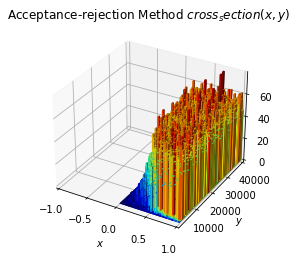

Acceptance-rejection method nPoints=100000, nFunctionEval=254563, maxWeightEncounteredRej=1.157524228972834e+16, F_VAL_MAX=346157184117975.4


In [33]:
def plot_results(
    nPoints,
    vegasRatioFactor,
    nBins=50, # changed from 50 to 10
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
):
    bf = brute_force(nPoints, seed)
#     vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed)
    # brute force
    titleRej = r"Acceptance-rejection Method $cross_section(x,y)$"
    lego_plot(bf["yy1"], bf["yy2"], nBins, "$x$", "$y$", titleRej)
    plt.show()

#     # Vegas method
#     titleVrho = r"Vegas Method $p(x,y)$"
#     lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$x$", "$y$", titleVrho)
#     plt.show()

#     titleVegas = r"Vegas Method $f(x,y)$"
#     lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$x$", "$y$", titleVegas)
#     plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
#     print(
#         f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
#     )


plot_results(100_000, 100) # changed 0.1 to 0.5 (vegas ratio factor)
# vegas ratio factor is the ratio of the function youre trying to evaluate divided by the prob dist

In [ ]:
# VEGAS implementation below